In [1]:
from load_data import read_data

In [2]:
ds = read_data('../data/train-orig.csv', '../data/train/')

In [3]:
ds

<xarray.Dataset>
Dimensions:        (image_id: 224, x: 2048, y: 2048)
Coordinates:
  * image_id       (image_id) object 'JSC105' 'JSC240' ... 'JSC138' 'JSC115'
Dimensions without coordinates: x, y
Data variables:
    greyscale      (image_id, x, y) uint8 223 205 222 224 ... 211 209 222 217
    sample         (image_id) object 'M-19-271' 'M-19-274' ... 'M-19-271'
    lifetime       (image_id) int64 150 155 95 160 155 155 ... 90 55 55 55 150
    magnification  (image_id) int64 2000 500 500 500 500 ... 500 500 500 2000
    uncertainty    (image_id) int64 5 7 7 14 7 7 7 7 ... 14 21 14 14 64 64 64 5

In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [5]:
data_frame = read_data()
X = data_frame['greyscale']
Y = data_frame['lifetime']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [6]:
X_train.shape

(156, 2048, 2048)

In [28]:
# Fourier feature mapping
def input_mapping(x, B): 
    
      if B is None:
        return x
      else:
        x_proj = (2.*np.pi*x) @ B.T
        return np.concatenate([np.sin(x_proj), np.cos(x_proj)], axis=-1)


In [29]:
import numpy as np
mapping_size = 32
scale        = 10
B_gauss = np.random.normal(size=(mapping_size, 1))

In [30]:
X_train_test = X_train[0,:,:].to_numpy()

In [31]:
coords = np.linspace(0, 1, X_train_test.shape[0], endpoint=False)
x_test = np.stack(np.meshgrid(coords, coords), -1)

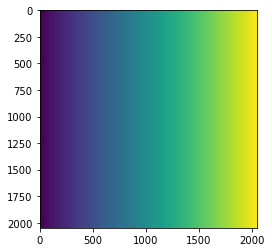

In [32]:
plt.imshow(x_test[:,:,0])

In [33]:
test_data = [x_test, X_train_test]

In [ ]:
_x = input_mapping(test_data[0], B_gauss)

In [37]:
print(test_data[0].shape, test_data[1].shape)

(2048, 2048, 2) (2048, 2048)


In [38]:
B_gauss.shape

(32, 1)

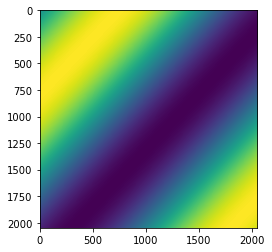

In [15]:
plt.imshow(_x[:,:,0])